# Proyek Analisis Data:
- **Nama:** Dimas Satrio W
- **Email:** dimaswicak70@gmail.com
- **ID Dicoding:** -

## Import Semua Packages/Library yang Digunakan

In [36]:
# import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import csv

## Data Wrangling

### Gathering Data

In [7]:
# membaca file day.csv
day = pd.read_csv('day.csv')

day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
# membaca file hour.csv
hour = pd.read_csv('hour.csv')

hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [9]:
# melihat info dari data day dan hour
day.info()
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [10]:
# melakukan cek missing value
day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [11]:
hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


dari data diatas di simpulkan bahwa tidak ada missing value dari kedua dataset

In [12]:
# melakukan pengecekan data duplikat
print("Jumlah data duplikat dalam dataset day :", day.duplicated().sum())
print("Jumlah data duplikat dalam dataset hour :", hour.duplicated().sum())

Jumlah data duplikat dalam dataset day : 0
Jumlah data duplikat dalam dataset hour : 0


Tidak ada data yang duplikat

**Insight:**
- tidak ada missing value dari kedua dataset
- tidak ada data yang duplikat

### Cleaning Data

Menghapus kolom yang tidak berhubungan  (Dropping)

In [13]:
# menghapus kolom instant dan workingday. menurut saya instant hanya digunakan sebagai primary keys di database dan untuk workingday akan kita buat kolom baru
day.drop(['workingday'], axis = 1, inplace= True)
hour.drop(['workingday'], axis = 1, inplace= True)

Mengubah tipe data dteday menjadi datetime, seperti yang kita tau pada gathering data. untuk kolom dteday bertipe object sehingga perlu kita ubah menjadi datetime agar data bisa di analisis dengan mudah

In [14]:
day['dteday'] = pd.to_datetime(day['dteday'])
hour['dteday'] = pd.to_datetime(hour['dteday'])

mengubah tipe data int menjadi category

In [15]:
# merubah tipe data int menjadi category pada kolom 'season', 'mnth', 'holiday', 'weekday', 'weathersit'
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for column in columns:
    day[column] =  day[column].astype("category")
    hour[column] =  hour[column].astype("category")

Mengubah nama

In [16]:
# mengganti nama kolom di dataset day agar lebih mudah
day.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [17]:
# mengganti nama kolon di dataset hour agar lebih mudah
hour.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [18]:
# mengubah isi kolom agar mudah dipahami
# mengubah season menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
day.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

# mengubah year menjadi angka category: 0:2011, 1:2012
day.year.replace((0,1), ('2011','2012'), inplace=True)
hour.year.replace((0,1), ('2011','2012'), inplace=True)

# mengubah month menjadi angka category: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# mengubah weather_situation menjadi angka category: 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
day.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
hour.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

# mengubah one_of_week menjadi angka category: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
day.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hour.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# menghitung humidity
day['humidity'] = day['humidity']*100
hour['humidity'] = hour['humidity']*100

<ipython-input-18-1a36e400c292>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
<ipython-input-18-1a36e400c292>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace

In [19]:
# membuat kolom baru bernama day_category untuk menentukan weekend atau weekdays
one_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def get_day_category(one_of_week):
    if one_of_week in ["Saturday", "Sunday"]:
        return "weekend"
    else:
        return "weekdays"

hour["day_category"] = hour["one_of_week"].apply(get_day_category)
day["day_category"] = day["one_of_week"].apply(get_day_category)

In [20]:
# membuat klasifikasi untuk kolom humidity
def humidity_classifier(humidity):
    if humidity < 45:
        return "Terlalu kering"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "Terlalu Lembab"

hour["humidity_category"] = hour["humidity"].apply(humidity_classifier)
day["humidity_category"] = day["humidity"].apply(humidity_classifier)

**Insight**


*   menghapus kolom yang tidak diperlukan
*   mengubah tipe data yang kurang sesuai
*   mengubah nama kolom agar lebih mudah
*   mengubah kategori kolom agar bisa di klasifikasi





## Exploratory Data Analysis (EDA)

### Explore dataset day

In [21]:
# melihat rangkuman parameter statistik dari dataset day
day.describe(include="all")

,instant,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,day_category,humidity_category
count,731.000000,731,731,731,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,4,2,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,Jan,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Ideal
freq,NaN,NaN,188,366,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,334
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


In [22]:
# melihat jumlah pemakaian sepeda berdasarkan kategori hari
day.groupby(by="one_of_week")['one_of_week'].count().reset_index(name="count")

<ipython-input-22-3602acdf0547>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day.groupby(by="one_of_week")['one_of_week'].count().reset_index(name="count")


,one_of_week,count
0,Sunday,105
1,Monday,105
2,Tuesday,104
3,Wednesday,104
4,Thursday,104
5,Friday,104
6,Saturday,105


Bisa kita simpulkan untuk pemakaian sepeda terjadi setiap hari secara konsisten

In [23]:
# melihat jumlah pemakaian sepeda berdasarkan kategori season
day.groupby(by="season").count_cr.sum().sort_values(ascending=False).reset_index()

<ipython-input-23-b452b568f9d6>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day.groupby(by="season").count_cr.sum().sort_values(ascending=False).reset_index()


,season,count_cr
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


untuk season yang paling banyak mengunakan penyewaan sepeda terjadi pada season Fall

In [24]:
# melihat jumlah penyewaan tiap tahun berdasarkan registered dan casual dan menghapus sum
day.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
}).reset_index().rename(columns={"year": "Year", "registered": "Registered", "casual": "Casual", "sum": "Total"})

,Year,Registered,Casual
,,Total,Total
0,2011,995851,247252
1,2012,1676811,372765


Untuk kategori registered bertambah menjadi 1676811 pada tahun 2012. terjadi peningkatan yang signifikan dibanding tahun 2011 berjumlah 995851

## Explore dataset day


In [25]:
# melihat rangkuman parameter statistik dari dataset hour
hour.describe(include="all")

,instant,dteday,season,year,month,hours,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,day_category,humidity_category
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,May,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Terlalu Lembab
freq,NaN,NaN,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,8356
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


In [26]:
# melihat pemakaian berdasarkan kategori jam
hour.groupby("hours").count_cr.sum().sort_index(ascending=True).reset_index()

,hours,count_cr
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


Bisa kita lihat, pemakaian terendah ada pada jam 4 dan pemakaian tertinggi ada pada jam 17

## Visualization & Explanatory Analysis

Berikut adalah beberapa pertanyaan bisnis terkait dengan dataset penyewaan sepeda
- Bagaimana performa penyewaan dalam beberapa tahun 2011 - 2012?
- Seberapa banyak seseorang yang memilih registered dibandingkan dengan casual?
- Pada musim apa penyewaan sepeda paling banyak?
- Per hari apakah penyewaan banyak terjadi?
- Jam berapa yang paling banyak dan paling sedikit disewa?


### Pertanyaan 1 : Bagaimana performa penyewaan dalam beberapa tahun 2011 - 2012?

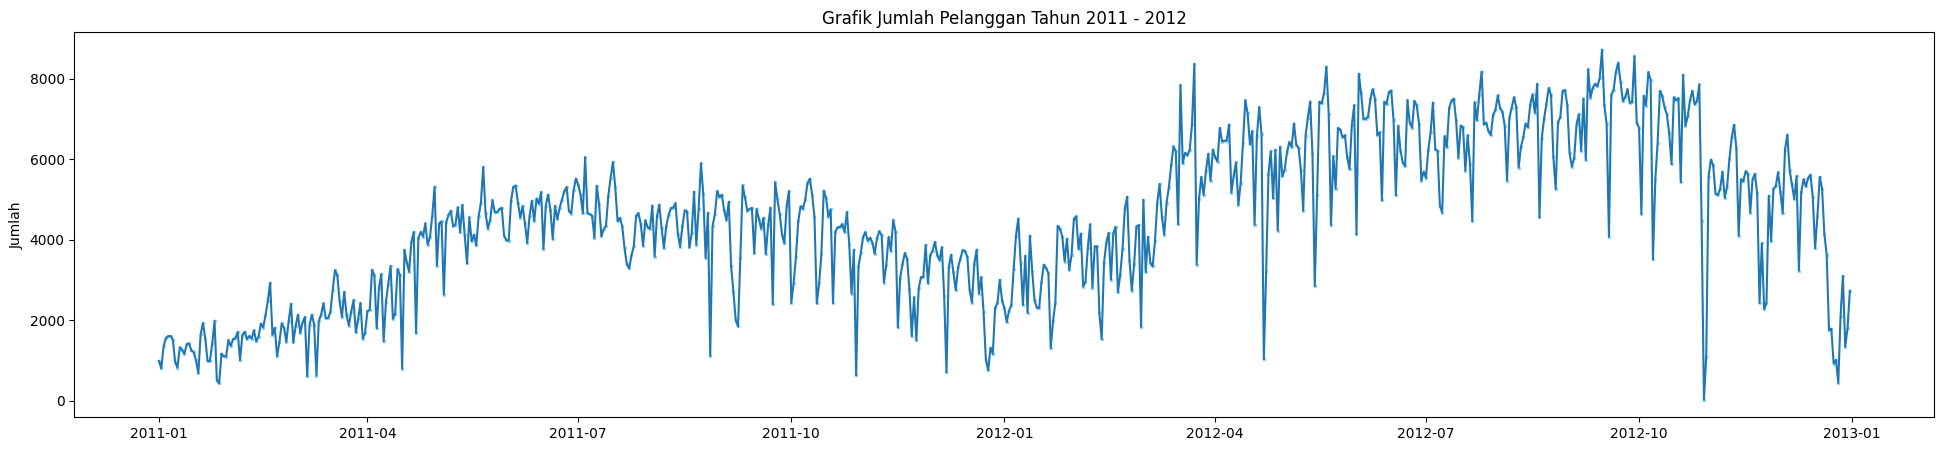

In [39]:
# mebuat figure dengan ukuran (24, 5)
plt.figure(figsize=(24, 5))

# menghitung jumlah pelanggan maksimum per bulan
monthly_counts = day['count_cr'].groupby(day['dteday']).max()

# membuat scatter plot untuk jumlah pelanggan tahun 2011 - 2012
plt.scatter(monthly_counts.index, monthly_counts.values, color="#90D5FF", s=10, marker='.')
plt.plot(monthly_counts.index, monthly_counts.values)
plt.ylabel('Jumlah')
plt.title('Grafik Jumlah Pelanggan Tahun 2011 - 2012')

# menampilkan plot
plt.show()

Dalam grafik berikut menunjukan seberapa banyak jumlah penyewaan sepeda dari tahun 2011 - 2012

### Pertanyaan 2 : Seberapa banyak perbandingan antara penyewa registered dibandingkan dengan casual?

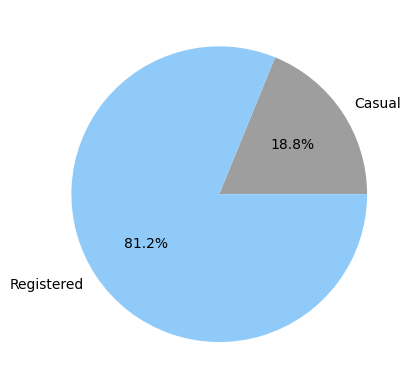

In [28]:
# Menjumlahkan semua elemen dalam kolom casual
total_casual = sum(day['casual'])

# Menjumlahkan semua elemen dalam kolom registered
total_registered = sum(day['registered'])

# Membuat data untuk pie plot
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

# Membuat pie plot
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#9E9E9E", "#90CAF9"])

# Menampilkan pie plot
plt.show()

Berikut adalah grafik perbandingan antara registered dan casual

###Pertanyaan 3 : Pada musim apa banyaknya pemakaian penyewa sepeda per season ?

<ipython-input-29-cacc12704ce8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="count_cr", x="season", data=day.sort_values(by="season", ascending=False), palette=color3, ax=ax)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.p

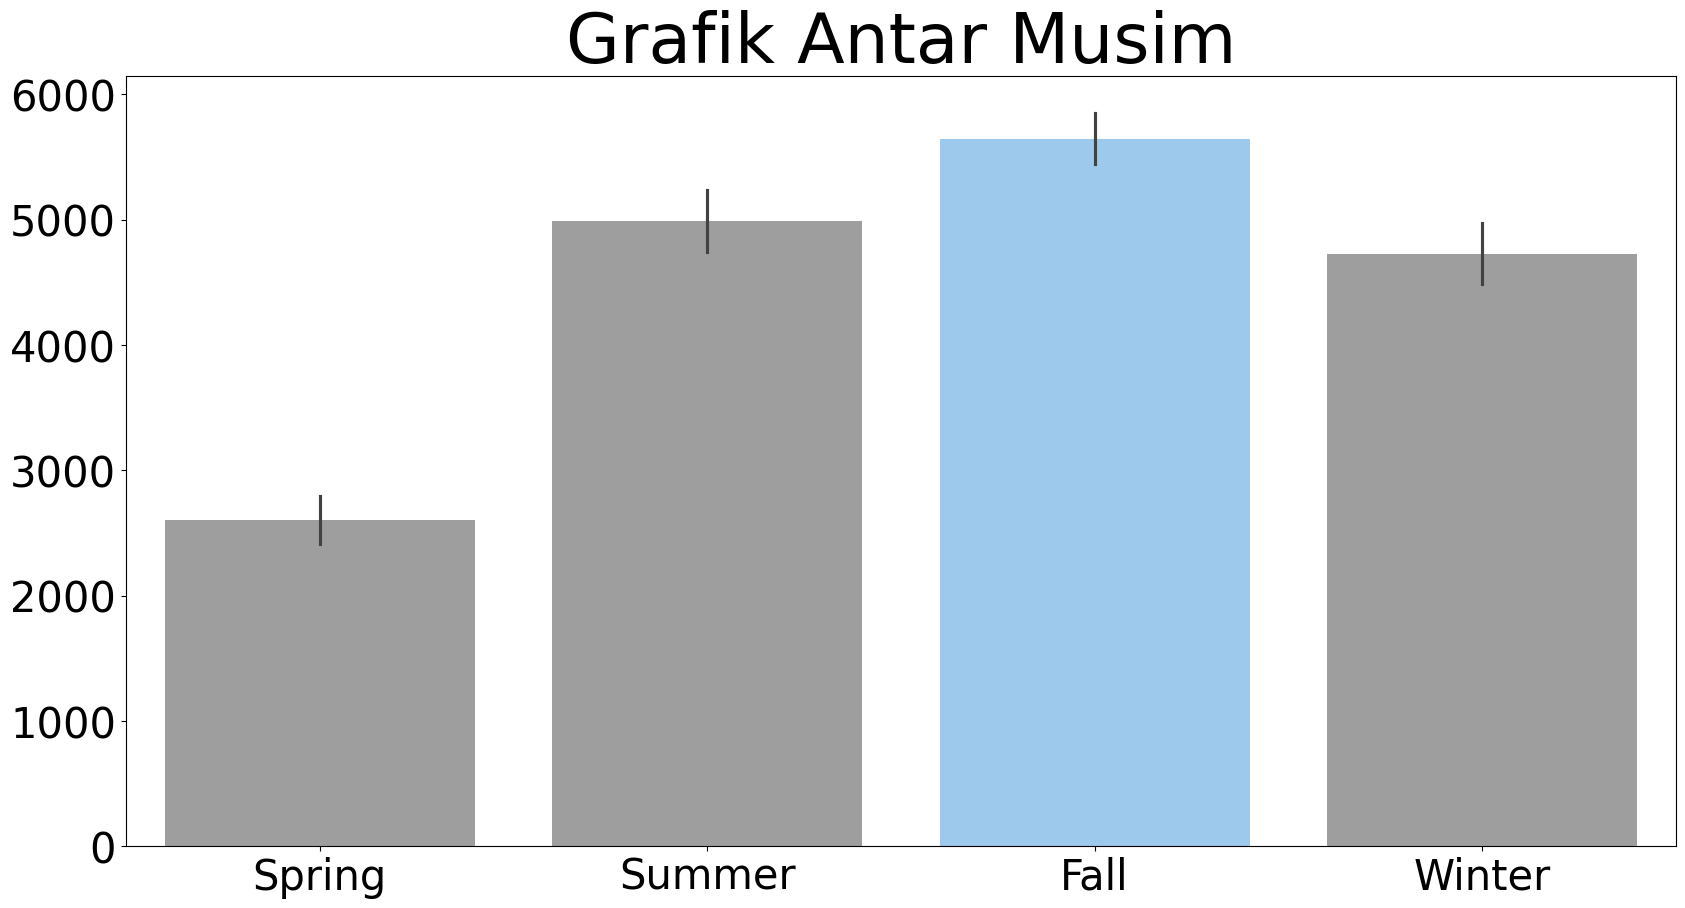

In [29]:
# mengatur warna
color3 = ["#9E9E9E", "#9E9E9E", "#90CAF9", "#9E9E9E"]

# membuat subplot dengan 1 baris dan 1 kolom, dengan ukuran (20, 10)
fig, ax = plt.subplots(figsize=(20, 10))

# Buat barplot untuk y="count_cr" dan x="season"
sns.barplot(y="count_cr", x="season", data=day.sort_values(by="season", ascending=False), palette=color3, ax=ax)

# mengatur judul, label y dan x
ax.set_title("Grafik Antar Musim", loc="center", fontsize=50)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)

# menampilkan plot
plt.show()

Pada grafik tersebut pemakaian terbanyak ada pada season Fall

### Pertanyaan 4 : Per hari apakah penyewaan banyak terjadi?

<ipython-input-30-8f18ab385678>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_of = day.groupby(by="one_of_week")['one_of_week'].count().reset_index(name="count")


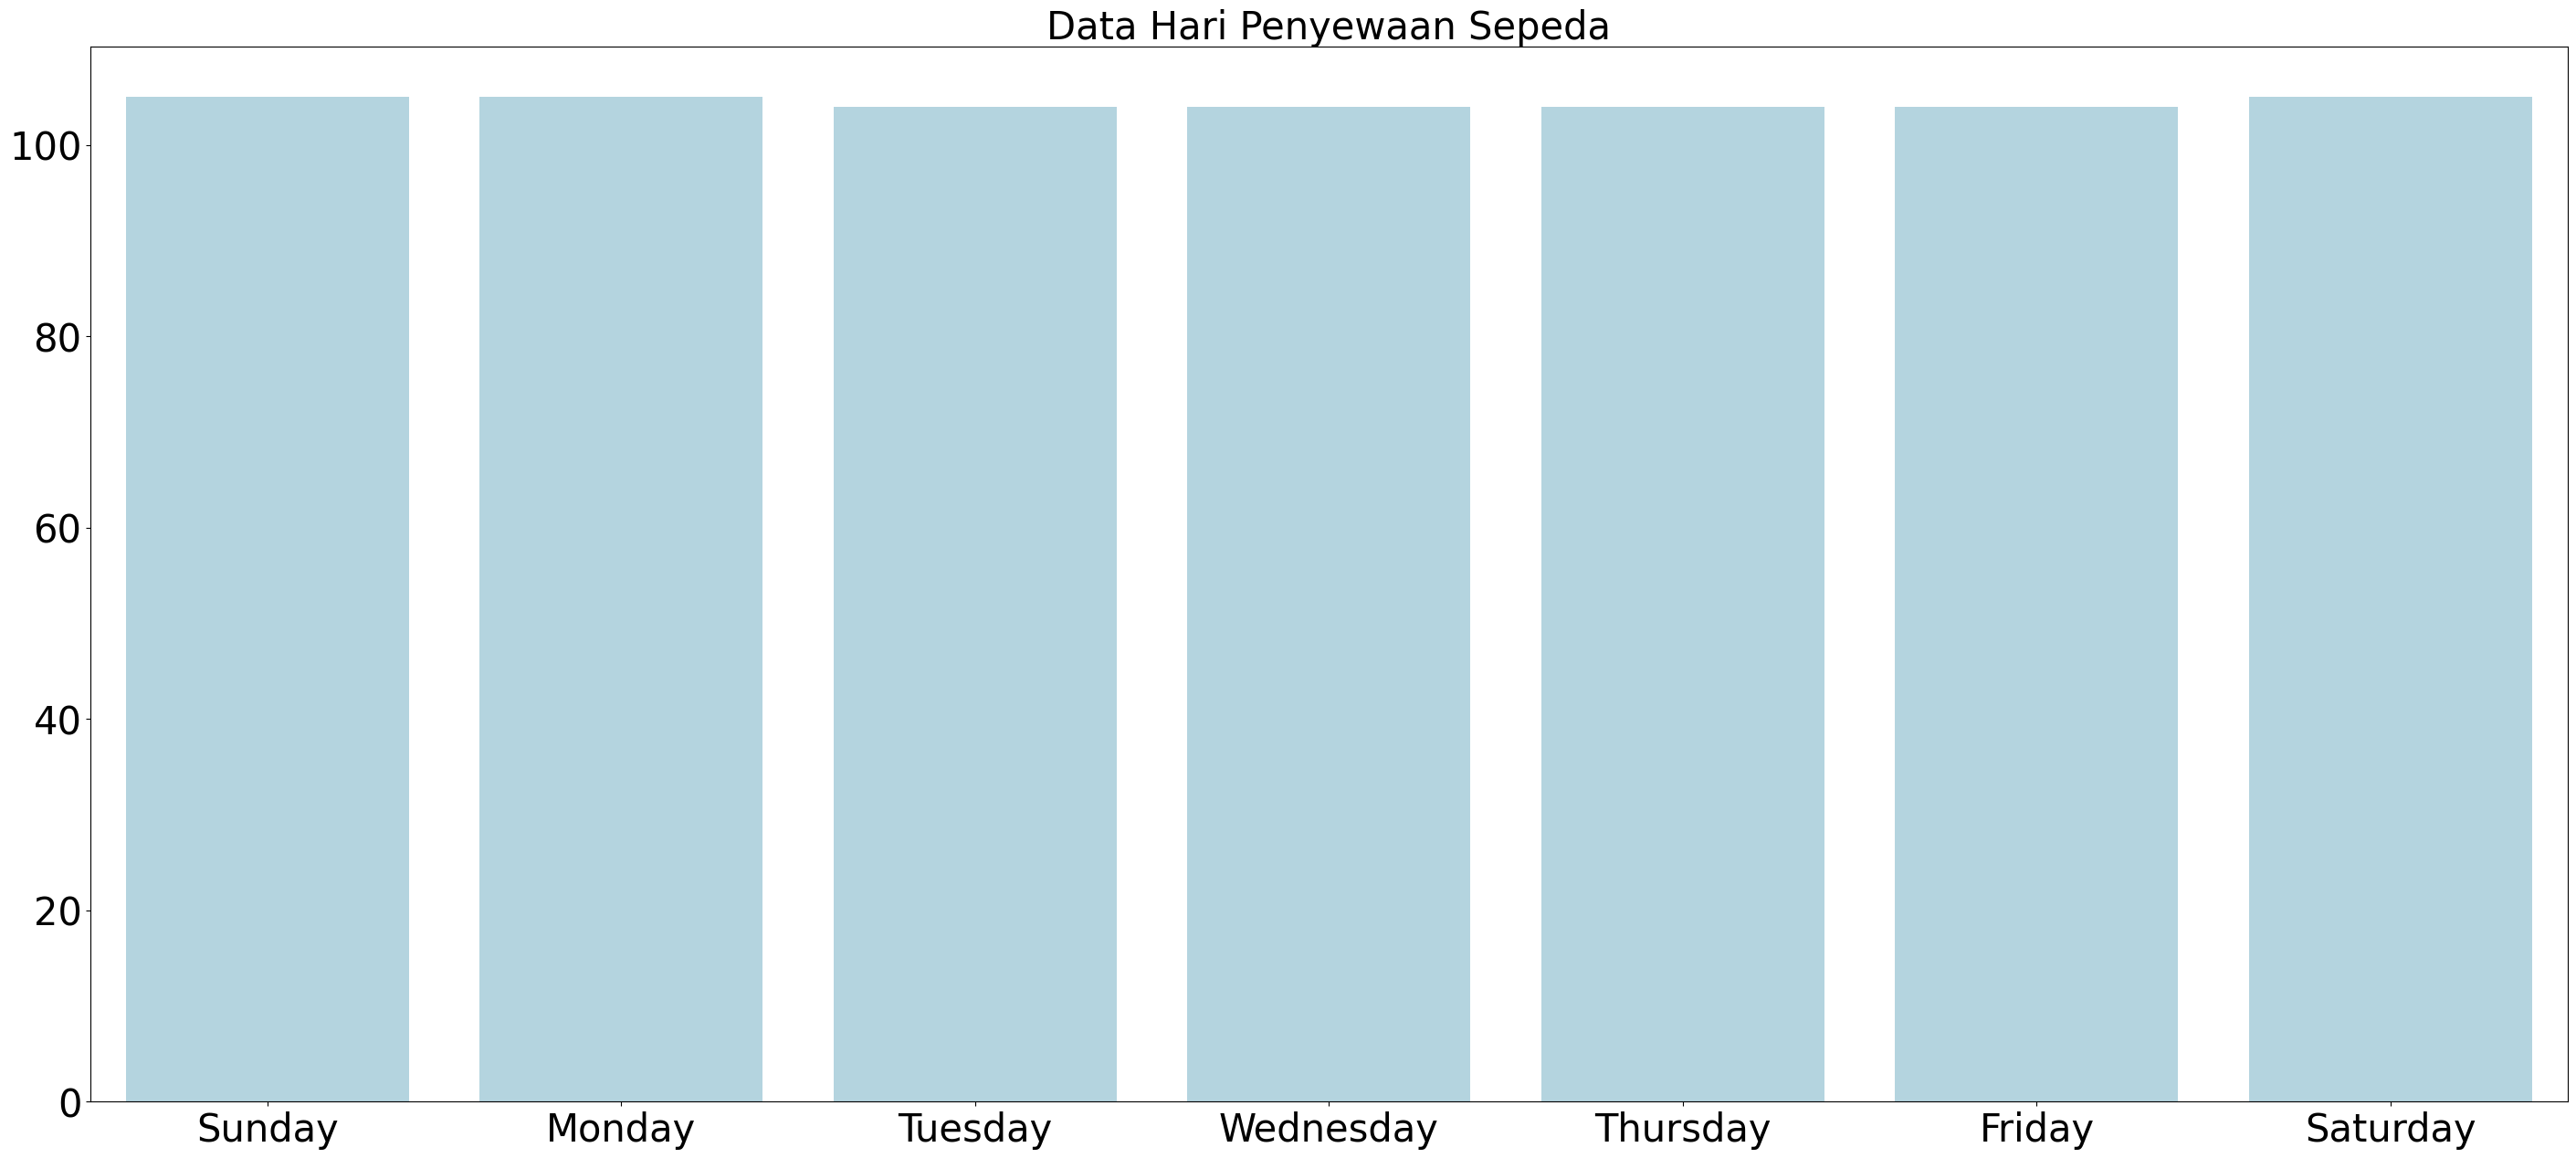

In [30]:
# Membuat grafik penyewaan perhari
day_of = day.groupby(by="one_of_week")['one_of_week'].count().reset_index(name="count")

fig, ax = plt.subplots(figsize=(35, 15))

sns.barplot(x="one_of_week", y="count", data=day_of, color="lightblue", ax=ax)
ax.set_title("Data Hari Penyewaan Sepeda", loc="center", fontsize=30)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='y', labelsize=30)
ax.tick_params(axis='x', labelsize=30)

Jumlah penyewa per kategori hari, bisa dilihat grafik stabil dan hampir stabil pada masing masing hari

### Pertanyaan 5: Jam berapa yang paling banyak dan paling sedikit disewa?

<ipython-input-31-7642e47e9d5b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.head(5), palette=color1, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWar

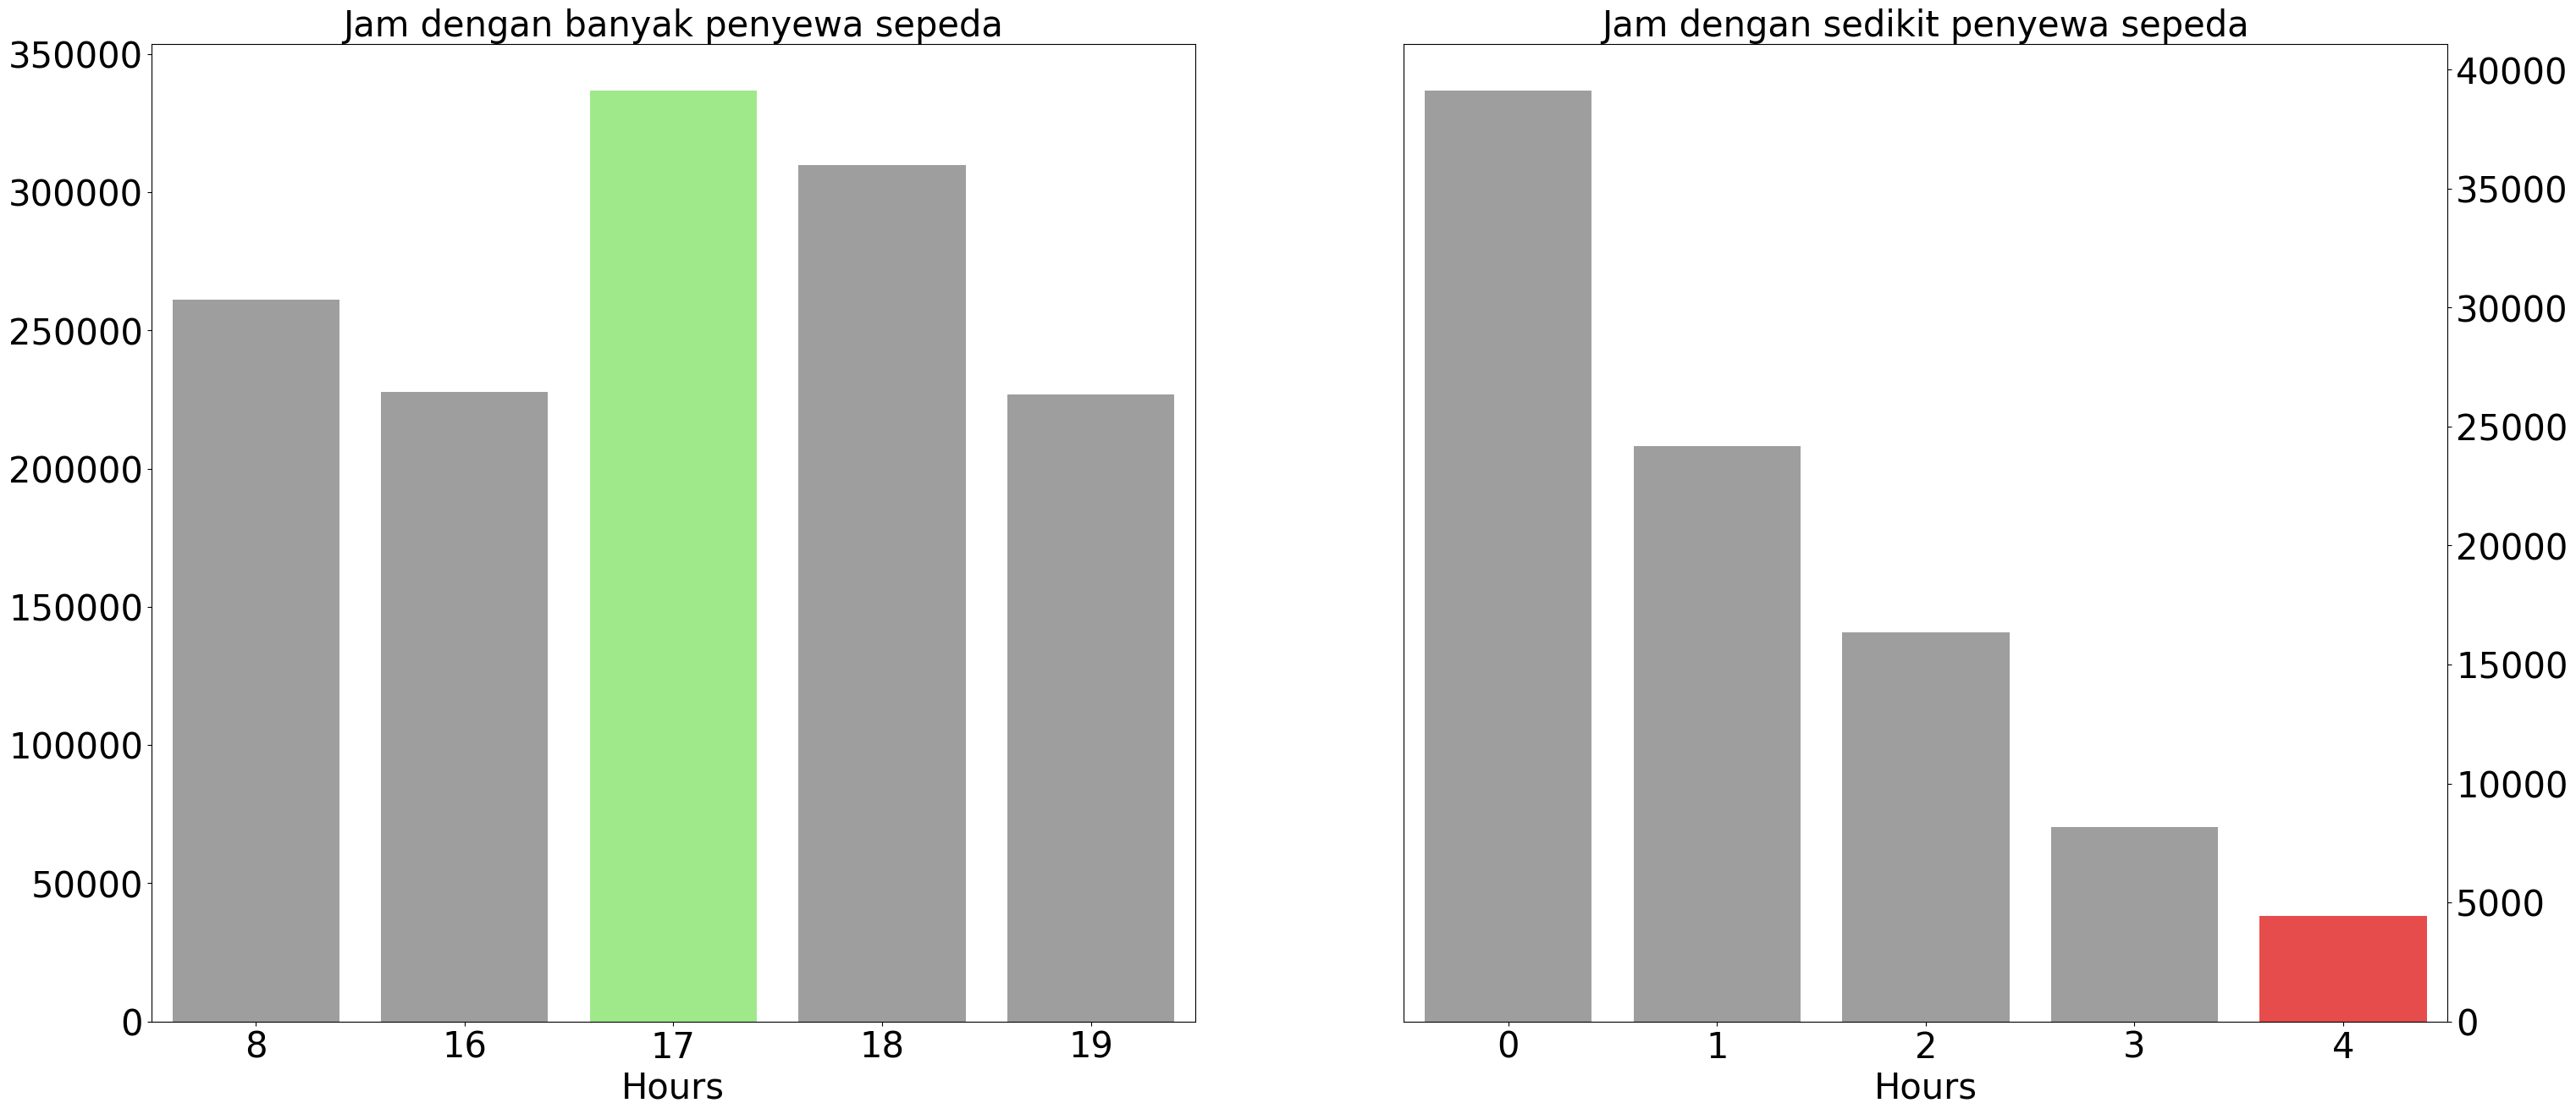

In [31]:
# membuat grafik dari hasil groupby berdasarkan jam pemakaian
# melakukan grouping terhadap hours dan count_cr
sum_order_items_df = hour.groupby("hours").count_cr.sum().sort_values(ascending=False).reset_index()

# membuat bar chart untuk melihat perbedaan penyewaan sepeda berdasarkan jam
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

# membuat barplot untuk penyewa sepeda terbanyak
color1 = ["#9E9E9E", "#9E9E9E", "#96F97B", "#9E9E9E", "#9E9E9E"]
sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.head(5), palette=color1, ax=ax[0])

# mengatur label dan judul untuk subplot pertama
ax[0].set_ylabel(None)
ax[0].set_xlabel("Hours", fontsize=30)
ax[0].set_title("Jam dengan banyak penyewa sepeda", loc="center", fontsize=30)
ax[0].tick_params(axis='y', labelsize=30)
ax[0].tick_params(axis='x', labelsize=30)

# membuat barplot untuk penyewa sepeda terdikit
color2 = ["#9E9E9E", "#9E9E9E", "#9E9E9E", "#9E9E9E", "#FF3333"]
sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.sort_values(by="hours", ascending=True).head(5), palette=color2, ax=ax[1])

# mengatur label dan judul untuk subplot kedua
ax[1].set_ylabel(None)
ax[1].set_xlabel("Hours",  fontsize=30)
ax[1].set_title("Jam dengan sedikit penyewa sepeda", loc="center", fontsize=30)
ax[1].tick_params(axis='y', labelsize=30)
ax[1].tick_params(axis='x', labelsize=30)
ax[1].yaxis.tick_right()

# menampilkan plot
plt.show()

Dari grafik diatas bisa dilihat untuk Grafik pemakaian paling banyak ada pada jam 17:00 dan pemakaian tersedikit ada pada jam 04:00

### **Conclusion:**
1. Bagaimana performa penyewaan dalam beberapa tahun 2011 - 2012?
2. Seberapa banyak seseorang yang memilih registered dibandingkan dengan casual?
3. Pada musim apa penyewaan sepeda paling banyak?
4. Per hari apakah penyewaan banyak terjadi?
5. Jam berapa yang paling banyak dan paling sedikit disewa?

Conclution pertanyaan 1: Berdasarkan visualisasi di atas, kita dapat melihat bahwa jumlah penyewa terbanyak terjadi pada bulan September 2012. Selain itu, kita juga dapat melihat adanya penurunan jumlah penyewa yang cukup signifikan terjadi pada bulan januari 2011.

Conclution pertanyaan 2: penyewa yang sudah registered sebanyak 81.2% sedangkan penyewa yang casual(belum melakukan registered) sebanyak 18.8%

Conclution pertanyaan 3: penyewa paling banyak terjadi pada musim Fall

conclution pertanyaan 4: Intensitas per masing masing hari terlihat stabil, dan terjadi hampir setiap hari

Conclution pertanyaan 5: dapat dilihat bahwa penyewaan sepeda paling banyak digunakan pada jam 17:00. Sedangkan, penyewaan paling sedikit terjadi pada jam 04:00




## Analisis Lanjutan (Opsional)

### 1. RFM Analysis

RFM Analysis dibawah ini digunakan untuk memahami perilaku pelanggan dari tiga faktor utama:

- Recency (seberapa baru pelanggan berinteraksi dengan bisnis)
- Frequency (banyaknya pelanggan dalam berinteraksi)
- Monetary (banyaknya uang yang mereka gunakan)

In [32]:
current_date = max(hour['dteday'])
rfm = hour.groupby('registered').agg({
    'dteday': lambda x: (current_date - x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'count_cr': 'sum'  # Monetary
}).reset_index()

# Mengganti nama kolom
rfm.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

print(rfm.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


### 2. Clustering analysis


#### Melakukan clustering total pengguna berdasarkan humidity

In [33]:
hour.groupby(by="humidity_category").agg({
    "count_cr": ["count"]})

,count_cr
,count
humidity_category,
Ideal,5505
Terlalu Lembab,8356
Terlalu kering,3518


kita mengidentifikasi penyewa lebih cenderung menyewa sepeda pada humidity yang terlalu lembab

#### Total Pengguna Berdasarkan weather_situation

In [34]:
hour.groupby(by="weather_situation").count_cr.nunique().sort_values(ascending=False)

<ipython-input-34-e944219b872f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour.groupby(by="weather_situation").count_cr.nunique().sort_values(ascending=False)


,count_cr
weather_situation,
Clear,848
Misty,649
Light_rainsnow,368
Heavy_rainsnow,3


kita dapat mengidentifikasi penyewa lebih cenderung menyewa sepeda pada hari yang clear

## menyimpan csv hasil cleaning

In [38]:
day.to_csv('day_clean.csv', index=False)
hour.to_csv('hour_clean.csv', index=False)